In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to run all arguments and not just the last one
from IPython.display import Image
%matplotlib inline

In [4]:
# Streaming workflows with pipelines
# the pipeline class allows us to fit a model including an arbitrary number of transformational steps and apply it to make 
# predictions about the new data
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [5]:
# We assign 30 features to a numpy array X. Using LabelEncoder, we convert class labels from M(malignant) and B(benign)
# to integers
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y) # malignant are now 1 and benign 0

le.transform(['M', 'B'])

array([1, 0])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [7]:
# we'll standardize the data and compress it from 30 dimensions to a 2 dimensional subspace via PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test, y_test) # accuracy of 94.7%

# The pipeline object takes tuples as input, where the first value in each tuple is an arbitrary identifier string that we can 
# use to access the individual elements in a pipeline; the 2nd element is always a scikit-learn transformer or estimator
# In the pipeline we constructed, the intermediate steps are pipeline scikit-learn transformers and final step is an estimator
# When we ran fit on pipe_lr, StandardScalar performed fit and transform on the training data and passed on the data to 
# PCA which performed fit and transform on the scaled training data and passed it on to the estimator
# There is no limit to the number of intermediate steps in a pipeline and while it runs fit and transform on the training data,
# it only transforms the test data

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

0.94736842105263153

In [8]:
# Using k-fold cross validation to assess model performance

# Holdout method: 3 data sets: training, validation, test
# training set to fit different models
# validation set for model selection and hyperparameter optimization
# test set for final error prediction

# K-fold cross validation
# Stratified K-fold classification: class proportions are preserved in each fold
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)
scores = []
# for k, (train, test)

In [9]:
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('fold: %s, class dist.: %s, Acc: %.3f' %(k+1, np.bincount(y_train[train]), score))

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 1, class dist.: [256 153], Acc: 0.891


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 2, class dist.: [256 153], Acc: 0.978


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 3, class dist.: [256 153], Acc: 0.978


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 4, class dist.: [256 153], Acc: 0.913


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 5, class dist.: [256 153], Acc: 0.935


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 6, class dist.: [257 153], Acc: 0.978


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 7, class dist.: [257 153], Acc: 0.933


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 8, class dist.: [257 153], Acc: 0.956


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 9, class dist.: [257 153], Acc: 0.978


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

fold: 10, class dist.: [257 153], Acc: 0.956


In [10]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +/- 0.029


In [11]:
# scikit-learn also impliments a k fold cross validation scorer that allows us to evaluate our models really well
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV scrores: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV scrores: 0.950 +/- 0.029


In [12]:
# An extremely useful feature of the cross_val_score is that we can distribute the evaluation of the different folds across
# different CPU's of our machine using the n_jobs parameter. n_jobs=-1 will distribute across all available CPU's
# Another model selection technique is the bootstrap (not discussed in this book)

In [13]:
# Debugging algorithms with learning and validation curves
# learning curves help us check whether an algorithm is overfitting or underfitting
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(penalty="l2", random_state=0))])

/home/kanishk/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kanishk/anaconda3/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [14]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, 
                                                       train_sizes=np.linspace(.1, 1, 10), cv=10, n_jobs=1)

(0.8, 1.0)

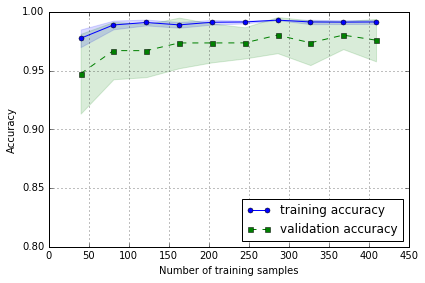

In [15]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

In [20]:
# Addressing overfitting and underfitting with validation curves
# learning curves have training sample size as the x axis
# validation curves have model parameters in the x axis, e.g. inverse regularization parameter C in lr
# Similar to a learning curve, validation curve uses stratified kfold cross validation
from sklearn.learning_curve import validation_curve
param_range = [.001, .001, .01, .1, 1, 10, 100]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C',
                                            param_range=param_range, cv=10)

In [21]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.8, 1.0)

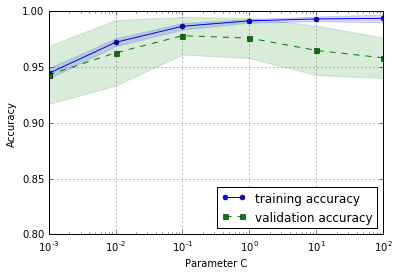

In [23]:
plt.plot(param_range, train_mean,
color='blue', marker='o',
markersize=5,
label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
train_mean - train_std, alpha=0.15,
color='blue')
plt.plot(param_range, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')
plt.fill_between(param_range,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

In [33]:
# Fine tuning machine learning models via grid search
# There are two types of parameters; those learned by the training data(like weights in lr) and ones optimized separately
# The latter are called hyperparameters, e.g. regularization parameter in lr and depth in trees
# One powerful hyperparameter optimizaion technique is called grid search that can further help improve performance 
# of a model by finding the optimal combination of hyperparameter values
# Grid seach is a brute force exhaustive search paradigm where we specify a list of values of different hyperparameters
# and the computer evaluates the performance of each combination to obtain the performance of each set
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])
param_range = [.0001, .001, .01, .1, 1, 10, 100, 1000]

param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

In [34]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.978021978021978


In [35]:
print(gs.best_params_)
# Finally, we can use the test set to evaluate the performance of the best selected model which is available via the 
# best_estimator_attribute of the GridSearchCV object

{'clf__kernel': 'linear', 'clf__C': 0.1}


In [36]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('test_accuracy: %.3f' % clf.score(X_test, y_test))

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

test_accuracy: 0.965


In [ ]:
# Grid search is computationally very expensive so another way to sampling different parameters combinations using
# scikit-learn is randomized search. Using the RandomizedSearchCV class in scikit-learn, we can draw random parameter
# combinations from sampling distributions with a specified budget

In [38]:
# Algorithm selection with nested cross validation
# it splits the data into outer loop and inner loop
# the outer loop is used to split the data into training and test sets and the inner loop is used to perform kfold
# cross validation on the training sets
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print('CV_accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# the returned average cross validation gives us a good estimate of what to expect if we tune the hyperparameters 
# of the model and then use it on unseen data e.g we can compare an svm to a decision tree and only tune the
# depth for simplicity

CV_accuracy: 0.972 +/- 0.012


In [41]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                 param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                 scoring='accuracy', cv=5)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV_accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV_accuracy: 0.908 +/- 0.045


In [43]:
# Looking at different performance evaluation metrics
# Other metrics apart from accuracy that are important are precision, recall and F1-score
# reading a confusion matrix
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [44]:
confmat = confusion_matrix(y_true=y_test, y_pred=pipe_svc.predict(X_test))

In [48]:
y_pred=pipe_svc.predict(X_test)

In [45]:
print(confmat)
# [[True positives False Negetives]
#  [False Positives True negetives]]

[[71  1]
 [ 2 40]]


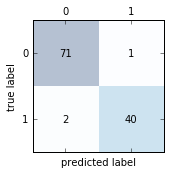

In [46]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [50]:
# Optimizing precision and recall of the classification model
# For tumors or even defaults in loans, we are more concerned about true positive rate which is given by precision
# and recall. A combination of the two is called F1-score (all implemented in scikit-learn)
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred)) # true +ves/total +ves
print('recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))       # TP/(FN + TP)
print('f1_score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))         # 2*(pre*rec)/(pre+rec)

# precision makes more sense for loan defaults. 

precision: 0.976
recall: 0.952
f1_score: 0.964


In [52]:
# we can use a different metric in gridsearch via the scoring parameter
# http://scikit-learn.org/stable/modules/model_evaluation.html
# positive is the class labelled as 1. to specify a different positive label
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv=10)

(-0.05, 1.05)

(-0.05, 1.05)

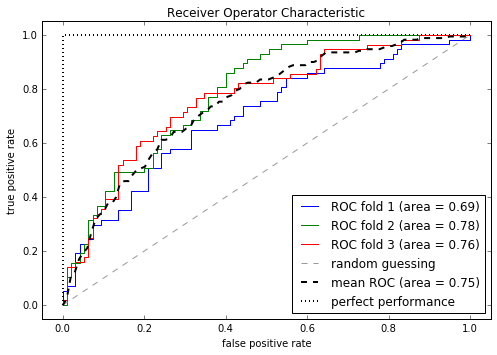

In [56]:
# Plotting a receiver operating characteristic
# ROC graphs are useful for classification bases on their performance wrt false positives and true positives which
# are computed by shifting the decison threshold of the classifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])

X_train2 = X_train[:, [4, 14]]


cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

In [63]:
# If we are just interested in the ROC AUC score
from sklearn.metrics import roc_auc_score, accuracy_score
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:, [4, 14]])
pipe_svc = pipe_svc.fit(X_train2, y_train)
ypred2 = pipe_svc.predict(X_test[:, [4, 14]])

print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.662
Accuracy: 0.711


In [64]:
# The scoring metric for multi-class scorer
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')